# Python 프로그래밍 Pandas
## 데이터프레임 Dataframe

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Pandas
- DataFrame이 무엇인지 이해한다.
- csv파일, 엑셀파일, DB의데이터를 가져오고 다시 저장해본다
- 탐색적분석을 수행해 본다
- 필요한 데이터를 선택해 가져온다
- 변수를 만들어 Dataframe에 추가하고 삭제한다
- DataFrame을 서로 연결한다

## Pandas 란
- 다른 Dataframe이나 고차원 객체로부터 컬럼을 추가 삭제
- group by함수
- 라벨 등을 이용한 데이터 부분 집합 추출
- 데이터 세로 가로 합치기
- 외부 데이터 연동의 견고함(CSV, Excel, databases, HDF5지원)
- missing data(NaN) 처리

https://pandas.pydata.org/pandas-docs/stable/

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
#os.chdir('d:/')
os.getcwd()
'**'.join(os.listdir('.'))

'C:\\Users\\NFSI291\\Python Study'

'.ipynb_checkpoints**Python_basic.ipynb**Python_numpy.ipynb**Python_pandas_basic.ipynb**Python_pandas_groupby.ipynb**도로교통공단_교통사고다발지역_20191010.csv'

In [4]:
data = pd.read_csv('도로교통공단_교통사고다발지역_20191010.csv', encoding='euc-kr')

# groupby

In [5]:
data.columns

Index(['사고지역관리번호', '사고년도', '사고유형구분', '위치코드', '시도시군구명', '사고지역위치명', '발생건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자'],
      dtype='object')

In [6]:
data.groupby('사고년도').사고유형구분.value_counts()

사고년도  사고유형구분
2012  무단횡단      564
      보행노인      508
      자전거       453
      보행어린이     198
      스쿨존어린이     35
2013  보행노인      552
      자전거       480
      무단횡단      389
      보행어린이     158
      스쿨존어린이     27
2014  보행노인      586
      자전거       586
      무단횡단      248
      보행어린이     130
      스쿨존어린이     43
2015  보행노인      606
      자전거       597
      무단횡단      244
      보행어린이     117
      스쿨존어린이     43
2016  보행노인      586
      자전거       492
      무단횡단      204
      보행어린이      91
      스쿨존어린이     47
2017  보행노인      552
      자전거       386
      무단횡단      212
      보행어린이      79
      스쿨존어린이     36
2018  보행노인      529
      자전거       321
      무단횡단      145
      보행어린이      79
      스쿨존어린이     42
Name: 사고유형구분, dtype: int64

In [7]:
data.groupby('사고년도').사고유형구분.value_counts().unstack()

사고유형구분,무단횡단,보행노인,보행어린이,스쿨존어린이,자전거
사고년도,,,,,
2012,564,508,198,35,453
2013,389,552,158,27,480
2014,248,586,130,43,586
2015,244,606,117,43,597
2016,204,586,91,47,492
2017,212,552,79,36,386
2018,145,529,79,42,321


In [8]:
pd.crosstab(data.사고년도, data.사고유형구분)

사고유형구분,무단횡단,보행노인,보행어린이,스쿨존어린이,자전거
사고년도,,,,,
2012,564,508,198,35,453
2013,389,552,158,27,480
2014,248,586,130,43,586
2015,244,606,117,43,597
2016,204,586,91,47,492
2017,212,552,79,36,386
2018,145,529,79,42,321


In [9]:
data.pivot_table(values='경상자수', index=['사고년도'], columns =['사고유형구분'], aggfunc='count')

사고유형구분,무단횡단,보행노인,보행어린이,스쿨존어린이,자전거
사고년도,,,,,
2012,564,508,198,35,453
2013,389,552,158,27,480
2014,248,586,130,43,586
2015,244,606,117,43,597
2016,204,586,91,47,492
2017,212,552,79,36,386
2018,145,529,79,42,321


In [10]:
data.pivot_table(values='경상자수', index=['사고년도'], columns =['사고유형구분'])

사고유형구분,무단횡단,보행노인,보행어린이,스쿨존어린이,자전거
사고년도,,,,,
2012,1.852837,1.096457,2.313131,1.114286,2.889625
2013,2.159383,1.217391,2.044304,1.259259,2.714583
2014,2.153226,1.431741,2.453846,1.116279,2.974403
2015,2.004098,1.405941,2.273504,1.558140,3.021776
2016,2.436275,1.358362,2.274725,1.106383,2.841463
2017,2.316038,1.423913,2.126582,1.083333,2.893782
2018,2.248276,1.327032,2.240506,1.190476,2.704050


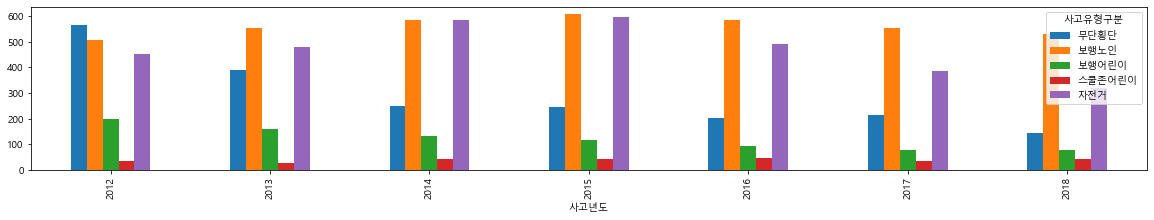

In [22]:
data.groupby('사고년도').사고유형구분.value_counts().unstack().plot(kind='bar', figsize=(20,3))

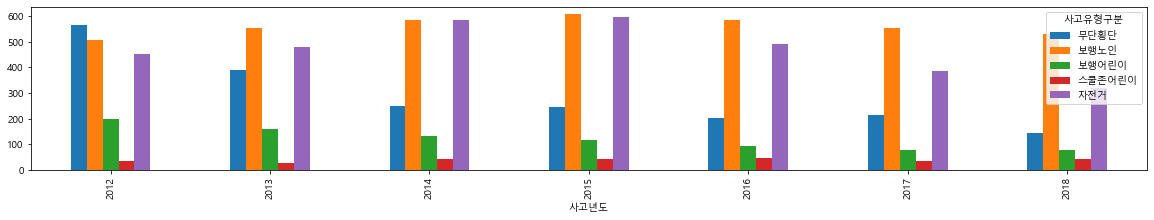

In [23]:
pd.crosstab(data.사고년도, data.사고유형구분).plot(kind='bar', figsize=(20,3))

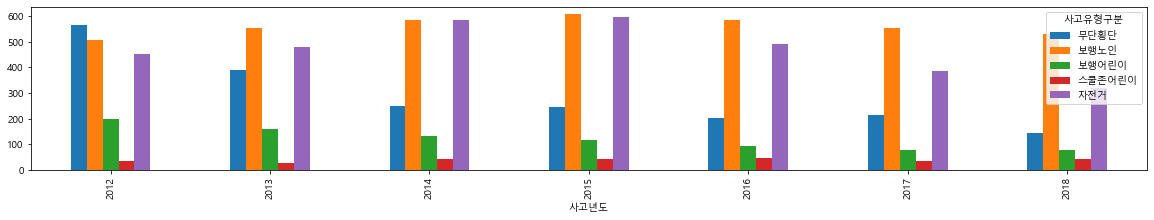

In [24]:
data.pivot_table(values='경상자수', index=['사고년도'], columns =['사고유형구분'], aggfunc='count').plot(kind='bar', figsize=(20,3))

In [511]:
data.head()

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10
3,2013060,2012,스쿨존어린이,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,37.610429,127.059596,"{type:Polygon,coordinates:[[[127.0619982,37.61...",2019-10-10
4,2013060,2012,스쿨존어린이,11320001,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,37.648129,127.024430,"{type:Polygon,coordinates:[[[127.0268336,37.65...",2019-10-10


In [512]:
data.groupby('사고유형구분').사망자수.sum()
data.pivot_table(values = '사망자수', index=['사고유형구분'], aggfunc=np.size)
data.pivot_table(values = '사망자수', index=['사고유형구분'], aggfunc=np.sum)
data.pivot_table(values = '사망자수', index=['사고유형구분'], aggfunc=np.mean)

사고유형구분
무단횡단       836
보행노인      1288
보행어린이       23
스쿨존어린이      34
자전거        247
Name: 사망자수, dtype: int64

,사망자수
사고유형구분,
무단횡단,2006
보행노인,3919
보행어린이,852
스쿨존어린이,273
자전거,3315


,사망자수
사고유형구분,
무단횡단,836
보행노인,1288
보행어린이,23
스쿨존어린이,34
자전거,247


,사망자수
사고유형구분,
무단횡단,0.416750
보행노인,0.328655
보행어린이,0.026995
스쿨존어린이,0.124542
자전거,0.074510


In [513]:
data.사고유형구분.value_counts().sort_index()

무단횡단      2006
보행노인      3919
보행어린이      852
스쿨존어린이     273
자전거       3315
Name: 사고유형구분, dtype: int64

사고유형구분
무단횡단       836
보행노인      1288
보행어린이       23
스쿨존어린이      34
자전거        247
Name: 사망자수, dtype: int64

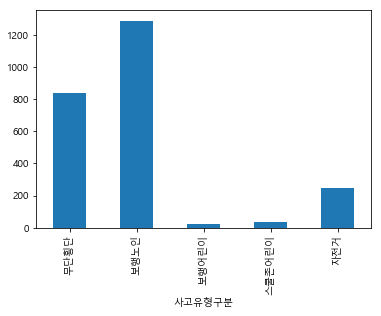

In [514]:
data.groupby('사고유형구분').사망자수.sum()
data.groupby('사고유형구분').사망자수.sum().plot(kind ='bar')

In [515]:
data.pivot_table(values = ['사망자수'], index=['사고유형구분', '사고년도'], aggfunc=np.sum)

사망자수
사고유형구분 사고년도      
무단횡단   2012   272
       2013   203
       2014   117
       2015   115
       2016    51
       2017    48
       2018    30
보행노인   2012   199
       2013   151
       2014   178
       2015   184
       2016   183
       2017   202
       2018   191
보행어린이  2012     5
       2013     4
       2014     0
       2015     3
       2016     6
       2017     4
       2018     1
스쿨존어린이 2012     1
       2013     1
       2014     4
       2015     8
       2016     9
       2017     8
       2018     3
자전거    2012    33
       2013    26
       2014    37
       2015    50
       2016    37
       2017    38
       2018    26

In [516]:
data.pivot_table(values = ['사망자수'], index=['사고유형구분', '사고년도'], aggfunc=np.sum).unstack()

사망자수                              
사고년도   2012 2013 2014 2015 2016 2017 2018
사고유형구분                                   
무단횡단    272  203  117  115   51   48   30
보행노인    199  151  178  184  183  202  191
보행어린이     5    4    0    3    6    4    1
스쿨존어린이    1    1    4    8    9    8    3
자전거      33   26   37   50   37   38   26

In [517]:
data.pivot_table(values = ['사망자수'], index=['사고유형구분'], columns=['사고년도'], aggfunc=np.sum)

사망자수                              
사고년도   2012 2013 2014 2015 2016 2017 2018
사고유형구분                                   
무단횡단    272  203  117  115   51   48   30
보행노인    199  151  178  184  183  202  191
보행어린이     5    4    0    3    6    4    1
스쿨존어린이    1    1    4    8    9    8    3
자전거      33   26   37   50   37   38   26

In [518]:
data.groupby('사고유형구분').size()
data.groupby('사고유형구분').size().sort_values(ascending=False)
data['사고유형구분'].value_counts()

사고유형구분
무단횡단      2006
보행노인      3919
보행어린이      852
스쿨존어린이     273
자전거       3315
dtype: int64

사고유형구분
보행노인      3919
자전거       3315
무단횡단      2006
보행어린이      852
스쿨존어린이     273
dtype: int64

보행노인      3919
자전거       3315
무단횡단      2006
보행어린이      852
스쿨존어린이     273
Name: 사고유형구분, dtype: int64

In [519]:
data.groupby('사고유형구분').사상자수.sum()
data.groupby('사고유형구분').사상자수.count()
data.groupby('사고유형구분').사상자수.median()
data.groupby('사고유형구분').사상자수.quantile([0.25, 0.75])
data.groupby('사고유형구분').사상자수.min()
data.groupby('사고유형구분').사상자수.max()
data.groupby('사고유형구분').사상자수.mean()
data.groupby('사고유형구분').사상자수.var()
data.groupby('사고유형구분').사상자수.std()

사고유형구분
무단횡단      12541
보행노인      17087
보행어린이      3178
스쿨존어린이      604
자전거       18603
Name: 사상자수, dtype: int64

사고유형구분
무단횡단      2006
보행노인      3919
보행어린이      852
스쿨존어린이     273
자전거       3315
Name: 사상자수, dtype: int64

사고유형구분
무단횡단      5
보행노인      4
보행어린이     3
스쿨존어린이    2
자전거       5
Name: 사상자수, dtype: int64

사고유형구분      
무단횡단    0.25    4.0
        0.75    7.0
보행노인    0.25    3.0
        0.75    5.0
보행어린이   0.25    3.0
        0.75    4.0
스쿨존어린이  0.25    2.0
        0.75    2.0
자전거     0.25    4.0
        0.75    6.0
Name: 사상자수, dtype: float64

사고유형구분
무단횡단      0
보행노인      2
보행어린이     2
스쿨존어린이    1
자전거       3
Name: 사상자수, dtype: int64

사고유형구분
무단횡단      31
보행노인      20
보행어린이      9
스쿨존어린이     7
자전거       22
Name: 사상자수, dtype: int64

사고유형구분
무단횡단      6.251745
보행노인      4.360041
보행어린이     3.730047
스쿨존어린이    2.212454
자전거       5.611765
Name: 사상자수, dtype: float64

사고유형구분
무단횡단      9.447316
보행노인      3.376974
보행어린이     1.050424
스쿨존어린이    0.631168
자전거       3.305172
Name: 사상자수, dtype: float64

사고유형구분
무단횡단      3.073649
보행노인      1.837654
보행어린이     1.024902
스쿨존어린이    0.794461
자전거       1.818013
Name: 사상자수, dtype: float64

In [520]:
data.groupby('사고유형구분').사상자수.agg(['count', 'median', 'min', 'max', 'mean', 'var', 'std'])

,count,median,min,max,mean,var,std
사고유형구분,,,,,,,
무단횡단,2006,5,0,31,6.251745,9.447316,3.073649
보행노인,3919,4,2,20,4.360041,3.376974,1.837654
보행어린이,852,3,2,9,3.730047,1.050424,1.024902
스쿨존어린이,273,2,1,7,2.212454,0.631168,0.794461
자전거,3315,5,3,22,5.611765,3.305172,1.818013


In [521]:
data.groupby('사고유형구분').사상자수.describe()

,count,mean,std,min,25%,50%,75%,max
사고유형구분,,,,,,,,
무단횡단,2006.0,6.251745,3.073649,0.0,4.0,5.0,7.0,31.0
보행노인,3919.0,4.360041,1.837654,2.0,3.0,4.0,5.0,20.0
보행어린이,852.0,3.730047,1.024902,2.0,3.0,3.0,4.0,9.0
스쿨존어린이,273.0,2.212454,0.794461,1.0,2.0,2.0,2.0,7.0
자전거,3315.0,5.611765,1.818013,3.0,4.0,5.0,6.0,22.0


# DataFrame 기본정보 확인 - sort

In [522]:
data.사고유형구분.value_counts()
data.사고유형구분.value_counts().reset_index()
data_sum = data.사고유형구분.value_counts().reset_index()

보행노인      3919
자전거       3315
무단횡단      2006
보행어린이      852
스쿨존어린이     273
Name: 사고유형구분, dtype: int64

,index,사고유형구분
0,보행노인,3919
1,자전거,3315
2,무단횡단,2006
3,보행어린이,852
4,스쿨존어린이,273


## 컬럼명을 부여

In [523]:
data_sum.columns = ['사고유형', '사고건수']

## 컬럼을 추출하고 sort

In [524]:
data_sum.head()
data_sum['사고유형'].sort_values()
data_sum['사고건수'].sort_values(ascending = False)
data_sum['사고건수']

,사고유형,사고건수
0,보행노인,3919
1,자전거,3315
2,무단횡단,2006
3,보행어린이,852
4,스쿨존어린이,273


2      무단횡단
0      보행노인
3     보행어린이
4    스쿨존어린이
1       자전거
Name: 사고유형, dtype: object

0    3919
1    3315
2    2006
3     852
4     273
Name: 사고건수, dtype: int64

0    3919
1    3315
2    2006
3     852
4     273
Name: 사고건수, dtype: int64

## 전체 테이블에 대해 - sort

In [525]:
data_sum['사고유형'].sort_values()
data_sum.sort_values('사고유형')
data_sum.sort_values('사고유형', ascending = False)

2      무단횡단
0      보행노인
3     보행어린이
4    스쿨존어린이
1       자전거
Name: 사고유형, dtype: object

,사고유형,사고건수
2,무단횡단,2006
0,보행노인,3919
3,보행어린이,852
4,스쿨존어린이,273
1,자전거,3315


,사고유형,사고건수
1,자전거,3315
4,스쿨존어린이,273
3,보행어린이,852
0,보행노인,3919
2,무단횡단,2006


In [526]:
data_sum.sort_values(['사고유형', '사고건수'])
data_sum.sort_values(['사고유형', '사고건수'], ascending=[False, True])
data_sum.sort_values(by =['사고유형', '사고건수'], ascending=[False, True])

,사고유형,사고건수
2,무단횡단,2006
0,보행노인,3919
3,보행어린이,852
4,스쿨존어린이,273
1,자전거,3315


,사고유형,사고건수
1,자전거,3315
4,스쿨존어린이,273
3,보행어린이,852
0,보행노인,3919
2,무단횡단,2006


,사고유형,사고건수
1,자전거,3315
4,스쿨존어린이,273
3,보행어린이,852
0,보행노인,3919
2,무단횡단,2006


In [527]:
data_sum.sort_values('사고유형').사고유형

2      무단횡단
0      보행노인
3     보행어린이
4    스쿨존어린이
1       자전거
Name: 사고유형, dtype: object

In [528]:
data.columns

Index(['사고지역관리번호', '사고년도', '사고유형구분', '위치코드', '시도시군구명', '사고지역위치명', '발생건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자'],
      dtype='object')

In [530]:
data_col = data[['사고유형구분', '발생건수']]
data_col.head()

,사고유형구분,발생건수
0,스쿨존어린이,2
1,스쿨존어린이,2
2,스쿨존어린이,2
3,스쿨존어린이,3
4,스쿨존어린이,2


## 컬럼명 변경 - rename 메소드 이용

In [532]:
data_col = data_col.rename(columns ={'사고유형구분':'유형', '발생건수':'건수'})
data_col.columns

Index(['유형', '건수'], dtype='object')

In [534]:
data_col = data_col.rename(columns ={'유형':'사고유형구분', '건수':'발생건수'})
data_col.columns

Index(['사고유형구분', '발생건수'], dtype='object')

## 컬럼명 변경 - columns 값 치환

In [535]:
data_col.columns = ['유형', '건수']
data_col.columns

Index(['유형', '건수'], dtype='object')

## 컬럼명 조건에 의해 동시 변경

In [537]:
data_col.columns = data_col.columns.str.replace('건', '')
data_col.columns

Index(['유형', '수'], dtype='object')

In [538]:
data_col.columns = ['사고유형구분', '발생건수']
data_col.columns

Index(['사고유형구분', '발생건수'], dtype='object')

In [539]:
data_col.columns.str.replace('구분|건수', repr) # representation 해당 건을 보여줌 

Index(['사고유형<re.Match object; span=(4, 6), match='구분'>', '발생<re.Match object; span=(2, 4), match='건수'>'], dtype='object')

In [540]:
data_col.columns = data_col.columns.str.replace('구분|건수', repr)
data_col.columns

Index(['사고유형<re.Match object; span=(4, 6), match='구분'>', '발생<re.Match object; span=(2, 4), match='건수'>'], dtype='object')

In [543]:
data_col.head()

,"사고유형<re.Match object; span=(4, 6), match='구분'>","발생<re.Match object; span=(2, 4), match='건수'>"
0,스쿨존어린이,2
1,스쿨존어린이,2
2,스쿨존어린이,2
3,스쿨존어린이,3
4,스쿨존어린이,2


# DataFrame 구조 변환 - columns 순서

## Dataframe생성하면서 순서 정하기

In [549]:
df1 = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6], 'c':[7,8,9]}, index=[10,11,12])
df1

df2 = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6], 'c':[7,8,9]}, index=[10,11,12],
                  columns=['c', 'b', 'a'])
df2

df3 = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6], 'c':[7,8,9]}, index=[10,11,12],
                  columns=['b', 'a', 'c'])
df3

,a,b,c
10,1,4,7
11,2,5,8
12,3,6,9


,c,b,a
10,7,4,1
11,8,5,2
12,9,6,3


,b,a,c
10,4,1,7
11,5,2,8
12,6,3,9


## 다른 Dataframe으로 부터 만들면서 순서 정하기

In [550]:
df4 = pd.DataFrame(df1, columns =['c', 'b', 'a'])
df4

,c,b,a
10,7,4,1
11,8,5,2
12,9,6,3


## 다른 numpy array으로 부터 만들면서 순서 정하기

In [551]:
arr = np.random.rand(4,2)
df5 = pd.DataFrame(arr, columns =['one', 'two'])
df5

,one,two
0,0.291766,0.680842
1,0.280456,0.314685
2,0.257251,0.468599
3,0.401488,0.045281


## DataFrame 구조변환 - index

In [65]:
df = pd.DataFrame({'학생':np.random.choice(np.arange(10,20), 5, replace=False),
                   '국어':np.random.randint(70,101,5),
                   '수학': np.random.randint(60, 101, 5)})
df

,학생,국어,수학
0,18,94,66
1,19,80,94
2,10,87,99
3,14,75,98
4,13,88,93


In [68]:
df.set_index('학생')
df

,국어,수학
학생,,
18,94,66
19,80,94
10,87,99
14,75,98
13,88,93


,학생,국어,수학
0,18,94,66
1,19,80,94
2,10,87,99
3,14,75,98
4,13,88,93


In [69]:
df.set_index('학생', inplace =True)

df

,국어,수학
학생,,
18,94,66
19,80,94
10,87,99
14,75,98
13,88,93


In [70]:
df.sort_index(ascending = True)
df.sort_values('국어', ascending = True)

,국어,수학
학생,,
10,87,99
13,88,93
14,75,98
18,94,66
19,80,94


,국어,수학
학생,,
14,75,98
19,80,94
10,87,99
13,88,93
18,94,66


In [71]:
df.reset_index()
df

,학생,국어,수학
0,18,94,66
1,19,80,94
2,10,87,99
3,14,75,98
4,13,88,93


,국어,수학
학생,,
18,94,66
19,80,94
10,87,99
14,75,98
13,88,93


In [72]:
df.reset_index(inplace=True)
df

,학생,국어,수학
0,18,94,66
1,19,80,94
2,10,87,99
3,14,75,98
4,13,88,93


## DataFrame 구조변환 - dtype

In [96]:
data.dtypes
data.memory_usage(deep=True).sum()

사고지역관리번호          int64
사고년도            float64
사고유형구분         category
위치코드              int64
시도시군구명         category
사고지역위치명          object
발생건수            float64
사상자수            float64
사망자수              int64
중상자수              int64
경상자수              int64
부상자수              int64
위도              float64
경도              float64
사고다발지역폴리곤정보      object
데이터기준일자          object
dtype: object

13983231

## 각 컬럼의 개별 변경

In [77]:
data['사고년도'] = data['사고년도'].astype(float)

## 각 컬럼의 동시 변경

In [95]:
data = data.astype({'발생건수':'float', '사상자수': float})

## DataFrame 구조 변환 - category type

In [82]:
data['사고유형구분'] = data['사고유형구분'].astype('category')

In [86]:
data['시도시군구명'] = data['시도시군구명'].astype('category')

In [88]:
data['사고유형구분'].head()

0    스쿨존어린이
1    스쿨존어린이
2    스쿨존어린이
3    스쿨존어린이
4    스쿨존어린이
Name: 사고유형구분, dtype: category
Categories (5, object): [무단횡단, 보행노인, 보행어린이, 스쿨존어린이, 자전거]

In [90]:
data['사고유형구분'].unique()
sorted(data['사고유형구분'].unique())

[스쿨존어린이, 보행어린이, 보행노인, 자전거, 무단횡단]
Categories (5, object): [스쿨존어린이, 보행어린이, 보행노인, 자전거, 무단횡단]

['무단횡단', '보행노인', '보행어린이', '스쿨존어린이', '자전거']

In [102]:
data.사고유형구분.cat.codes
data.사고유형구분.cat.codes.value_counts()
data.사고유형구분.nunique()

0        3
1        3
2        3
3        3
4        3
        ..
10360    0
10361    0
10362    0
10363    0
10364    0
Length: 10365, dtype: int8

1    3919
4    3315
0    2006
2     852
3     273
dtype: int64

5

In [94]:
data['사고지역위치명'].unique()

array(['서울특별시 종로구 혜화동(혜화초교 부근)', '서울특별시 성북구 종암동(숭례초교 부근)',
       '서울특별시 성북구 동소문동7가(정덕초교 부근)', ..., '경기도 파주시 조리읍(봉일천우체국 부근)',
       '경기도 구리시 수택동(세븐일레븐 구리으뜸점 부근)', '경기도 포천시 소흘읍(송우순복음교회 부근)'],
      dtype=object)

# End 